# Assignment 1

### Load libraries

In [34]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random as ran
import collections
import math
import functools
import operator
from scipy import stats
import seaborn as sns
from matplotlib import rcParams
import datetime
import folium
import folium.plugins
from folium.plugins import HeatMap

 ### 1.1 Load some crime-data

In [8]:
# Read data from file 'filename.csv' 
crime_data = pd.read_csv("C:/Users/tala1/Skrivebord/Socialdata2022/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv", 
    parse_dates=['Date'])

crime_data.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,3114751606302,31147516,6302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,2003-09-28,10:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5069701104134,50697011,4134,ASSAULT,BATTERY,Wednesday,2005-06-22,12:20,NORTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,97.0
2,6074729204104,60747292,4104,ASSAULT,ASSAULT,Saturday,2006-07-15,00:55,CENTRAL,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,106.0
3,7103536315201,71035363,15201,ASSAULT,STALKING,Tuesday,2007-09-25,00:01,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,49.0
4,11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,2011-09-24,11:00,TARAVAL,LOCATED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Focuscrimes 
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# Part 1: Visualizing patterns in the data

#### 1.1- Weekly patterns. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Make your own version of the plot and comment your results.

<Figure size 432x288 with 0 Axes>

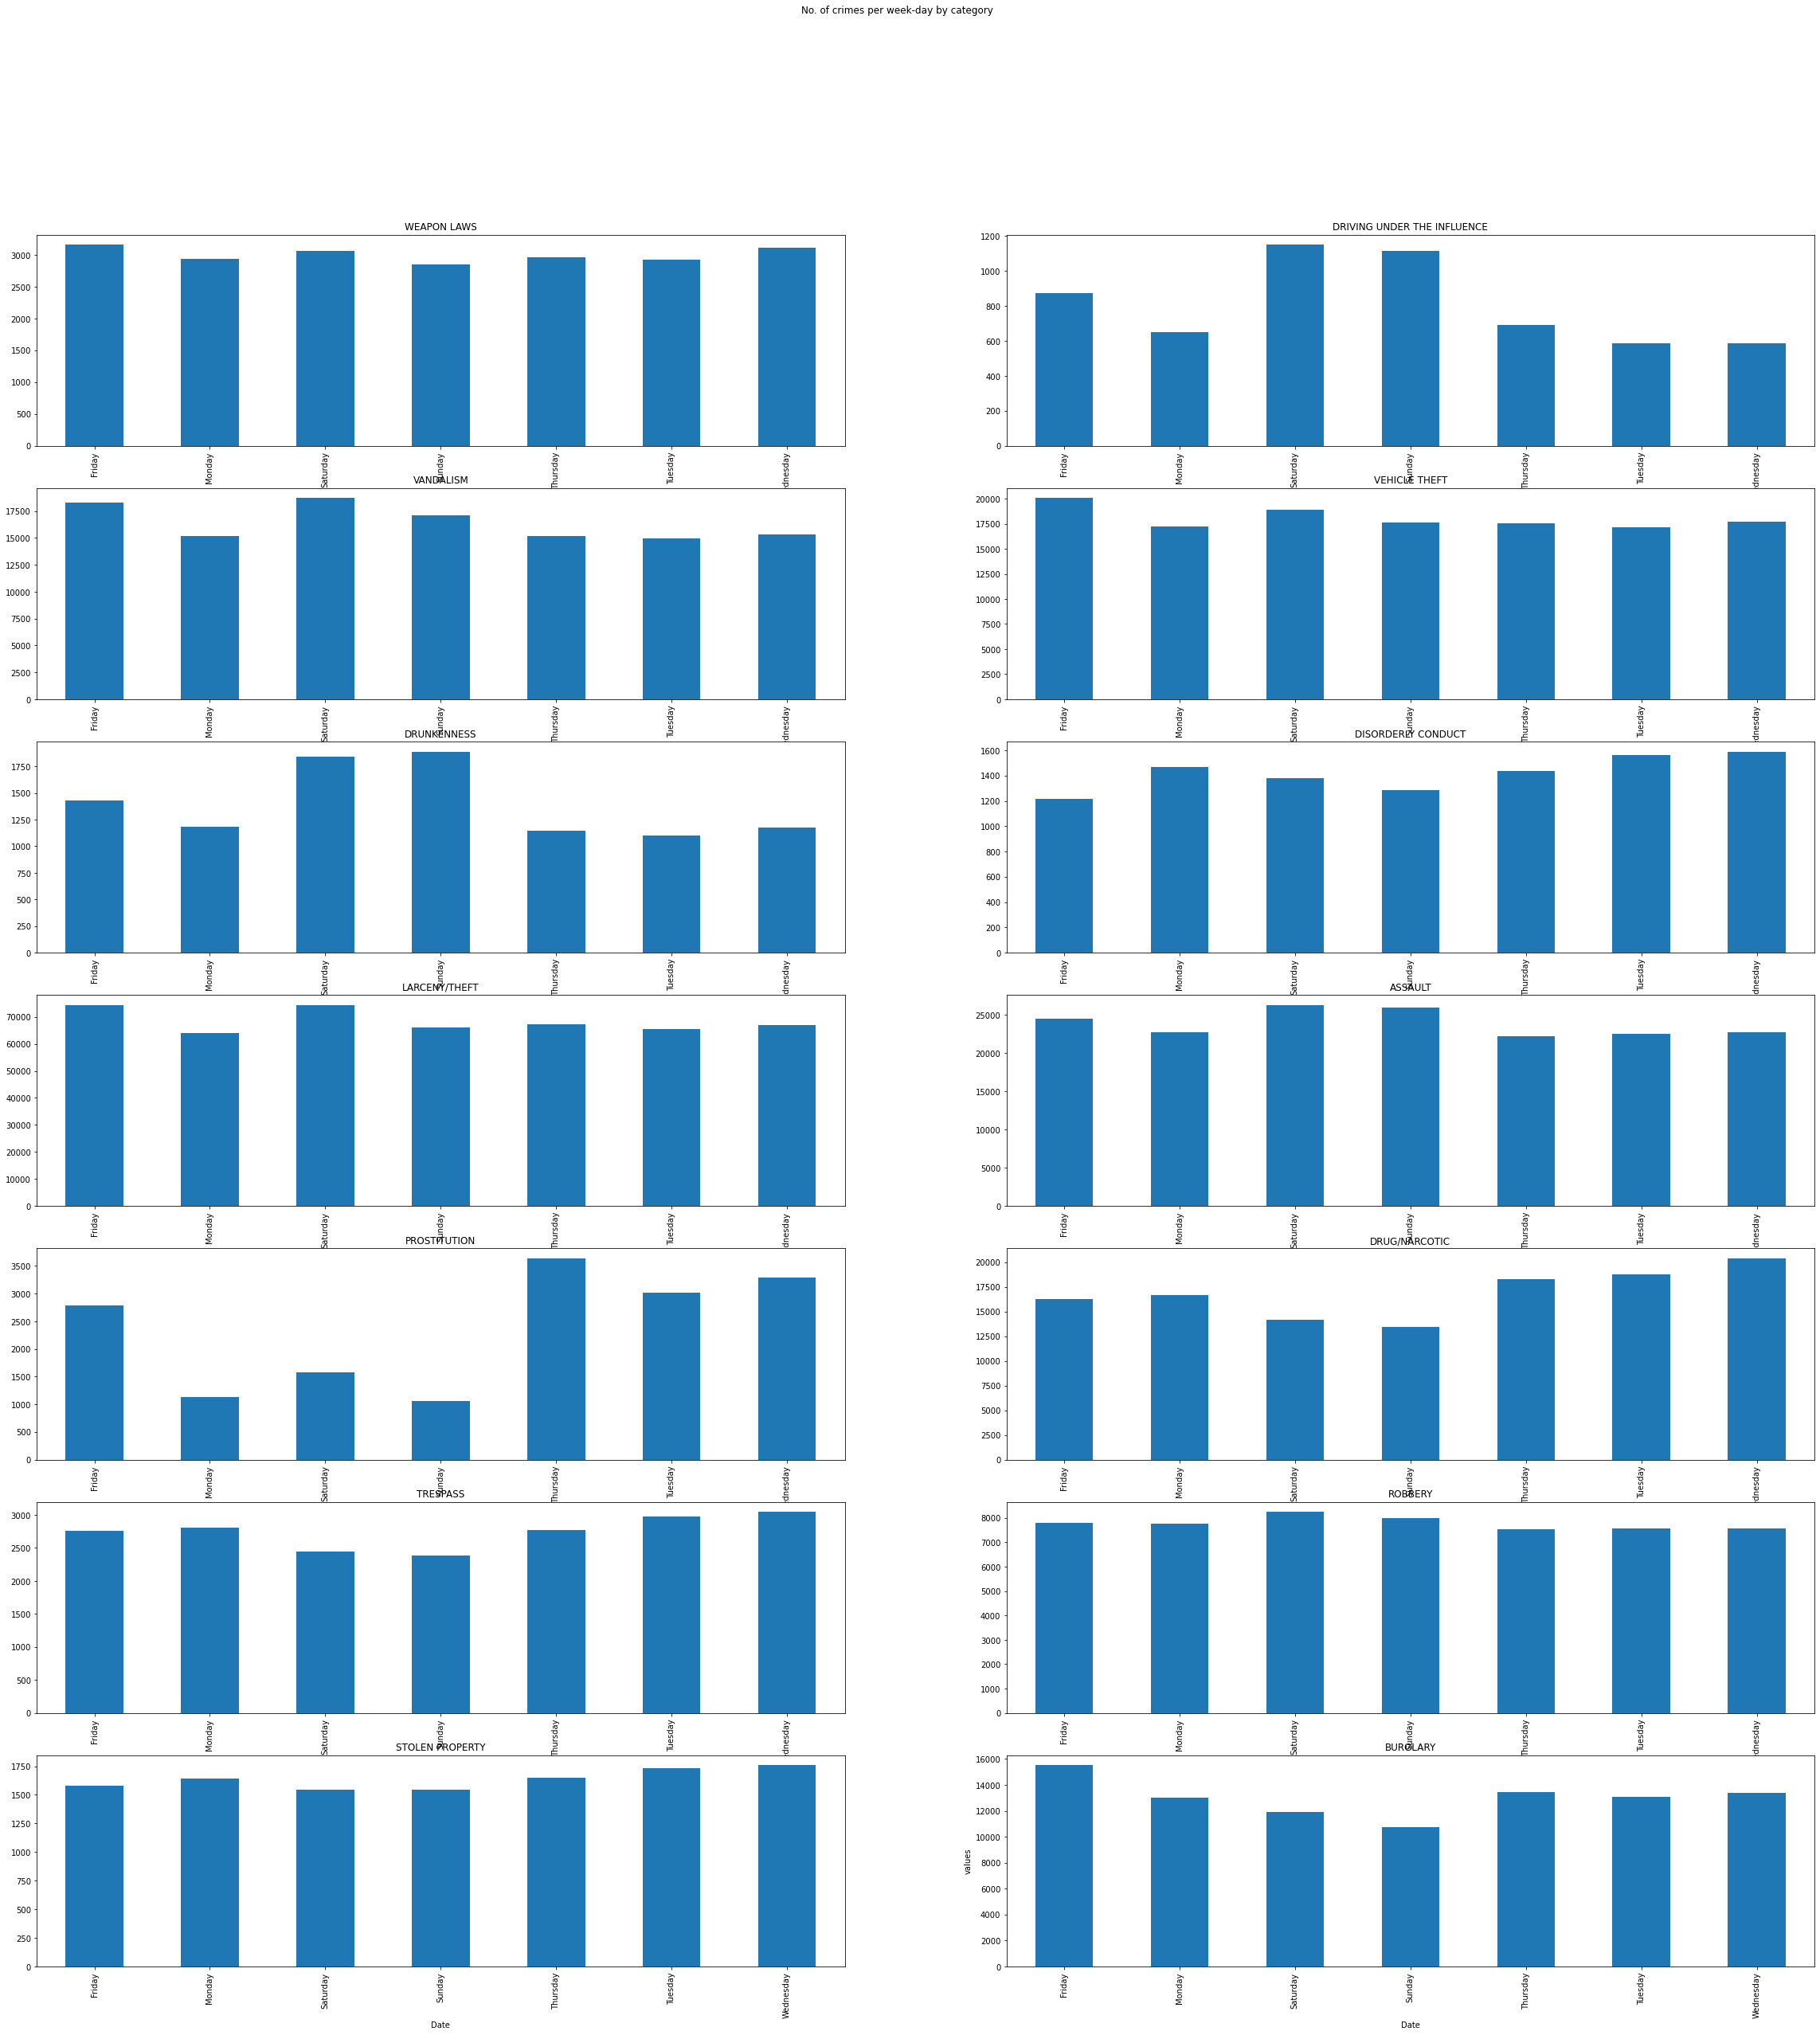

In [9]:
plt.subplots_adjust(wspace=2, hspace=10)
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(40,40))
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']

for ax, crime in zip(axes.flat, focuscrimes):
    plt.xlabel('weeldays')
    plt.ylabel('values')
    crime_data['Date'].loc[(crime_data['Category']==crime)].groupby(crime_data['Date'].dt.day_name()).agg('count').plot(kind='bar', ax=ax, title=crime)

    
fig.suptitle("No. of crimes per week-day by category")
plt.show()

#### 1.2 - Hours of the week. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [17]:
#reformat the time
crime_data['Time']= pd.to_datetime(crime_data['Time'], format="%H:%M")

In [15]:
#dataframe for hours of the week
crime_data_hoursOfTheWeek= crime_data[['Category', 'DayOfWeek','Time']]
crime_data_hoursOfTheWeek.head()

,Category,DayOfWeek,Time
0,LARCENY/THEFT,Sunday,1900-01-01 10:00:00
1,ASSAULT,Wednesday,1900-01-01 12:20:00
2,ASSAULT,Saturday,1900-01-01 00:55:00
3,ASSAULT,Tuesday,1900-01-01 00:01:00
4,MISSING PERSON,Saturday,1900-01-01 11:00:00


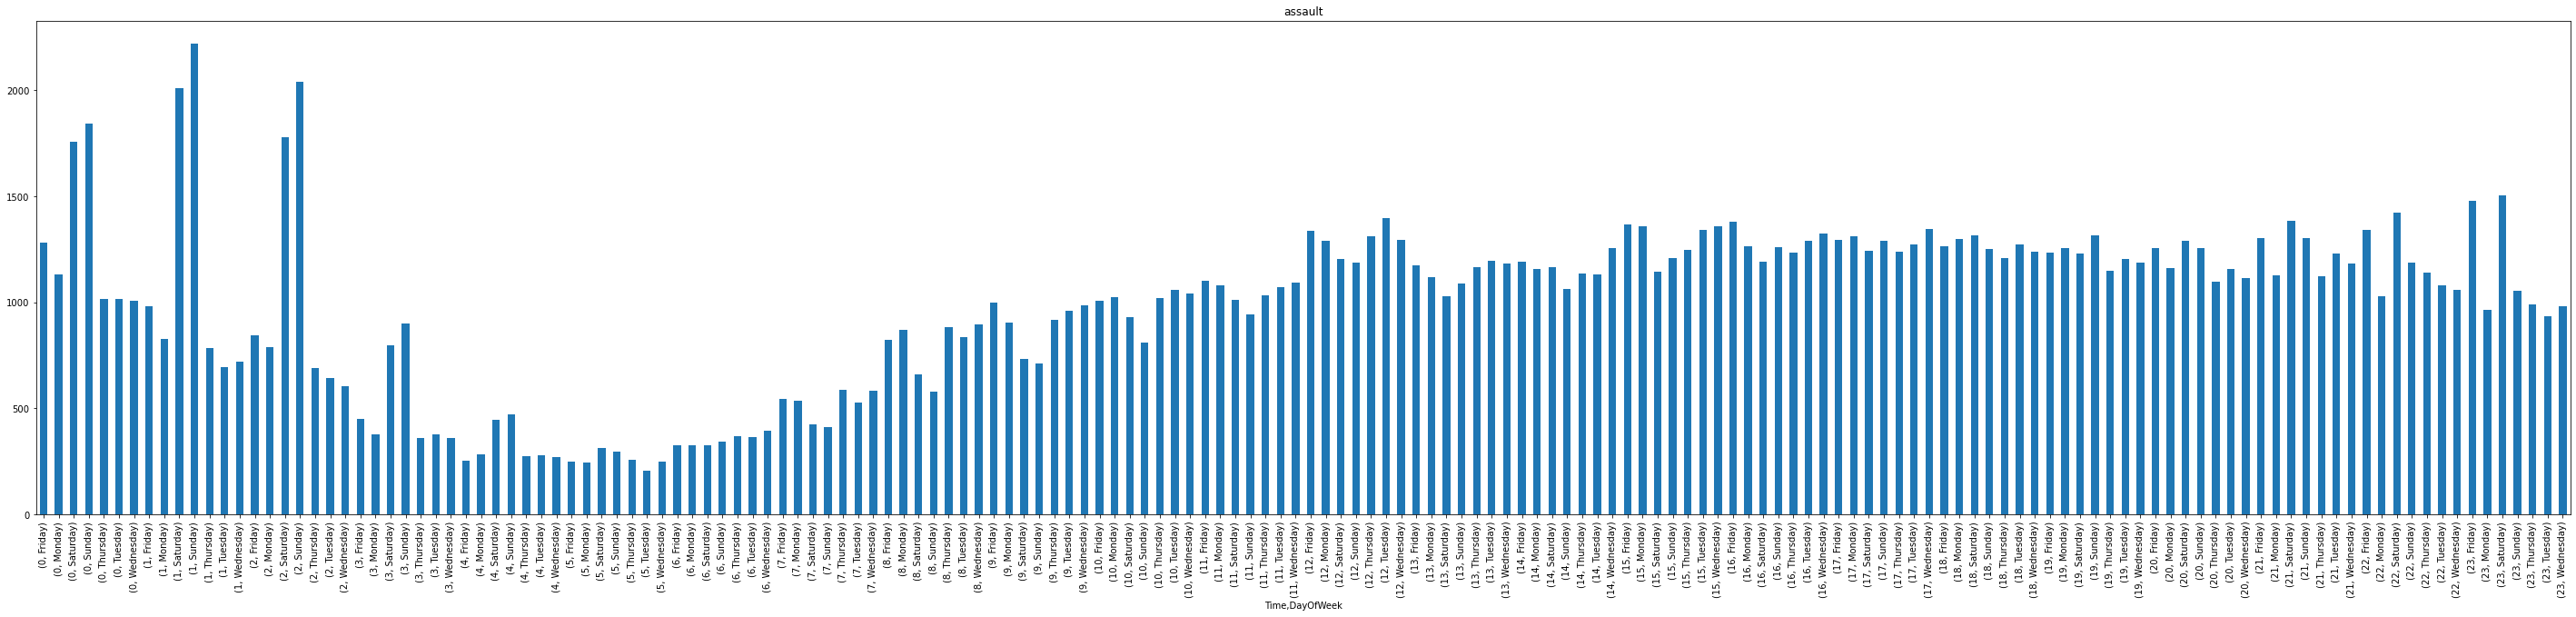

In [16]:
plt.figure(figsize=(50,10))
crime_data_hoursOfTheWeek['DayOfWeek'].loc[(crime_data_hoursOfTheWeek['Category']=='ASSAULT')].groupby([crime_data_hoursOfTheWeek['Time'].dt.hour, crime_data_hoursOfTheWeek['DayOfWeek']]).count().plot(kind='bar', title="assault")
plt.show()

####  1.3- Spatial patterns. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical:
    
  

#### 1.3.1- For each district plot the ratio P(crime|district)/P(crime) for the 14 focus crimes (follow and show the steps in Week 2 Ex. 2.2 for success).

#### 1.3.2- Comment on the top crimes in Tenderloin, Mission, and Richmond. Does this fit with the impression you get of these neighborhoods on Wikipedia?

# Part 2: Fundamentals of data visualization


#### 2.1- Questions from the lecture. Sune mentions in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

REFORMAT
* Step 1: Find the smallest and largest data point. If your smallest and/or largest numbers are not whole numbers, go to Step 2. If they are whole numbers, go to Step 3.

* Step 2: Lower the minimum a little and raise the maximum a little. For example, 1.2 as a minimum becomes 1, and 99.9 as a maximum becomes 100.

* Step 3: Decide how many bins you need using your best guess and using the guidelines listed in the intro paragraph above.

* Step 4: Divide your range (the numbers in your data set) by the bin size you chose in Step 3. For example, if you have numbers that range from 0 to 50, and you chose 5 bins, your bin size is 50/5=10.

* Step 5: Create the bin boundaries by starting with your smallest number (from Steps 1 and 2) and adding the bin size from Step 4. For example, if your smallest number is 0 and your bin size is 10 you would have bin boundaries of 0, 10, 20…

#### 2.2- Hypothesis testing. Use data 1 and data 2 to verify whether there is a statistically significant difference in the average number of steps taken by men and women.
   
    

In [20]:
#Load data
female_group_data = pd.read_csv("C:/Users/tala1/Skrivebord/Socialdata2022/03/data9b_f.csv") 
male_group_data = pd.read_csv("C:/Users/tala1/Skrivebord/Socialdata2022/03/data9b_m.csv") 

#### 2.2.1- Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in the previous step to define the right bin-size and comment on your choice.

In [21]:
#mean for feamle
female_avg = female_group_data['steps'].mean()
female_avg

6857.763157894737

In [22]:
#mean for male
male_avg =  male_group_data['steps'].mean()
male_avg

7792.545232273838

In [23]:
mean_differ=male_avg-female_avg
mean_differ

934.7820743791017

In [26]:
stats.ttest_ind(female_group_data['steps'], male_group_data['steps'])

Ttest_indResult(statistic=-5.539053975609961, pvalue=3.498915026461386e-08)

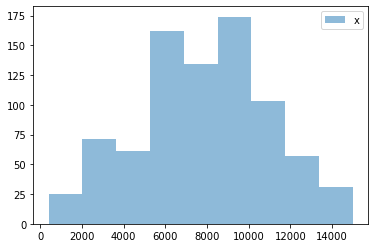

In [27]:
bins = np.linspace(min(male_group_data['steps']), max(male_group_data['steps']), 10) 

plt.hist(male_group_data['steps'], bins, alpha=0.5, label='x')
plt.legend(loc='upper right')
plt.show()

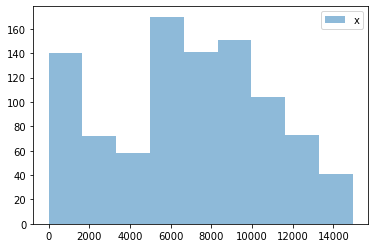

In [28]:
bins = np.linspace(min(female_group_data['steps']), max(female_group_data['steps']), 10) 

plt.hist(female_group_data['steps'], bins, alpha=0.5, label='x')
plt.legend(loc='upper right')
plt.show()

The H1 can be rejected as the p-value obtained is 3.498915026461386e-08 which is less than 0.05 

#### 2.2.2 Pretend you did not visualize the data yet. What was the explanation you found for what you observed? Explain the theory, news, papers, further analysis etc. you used to support your conclusions and write down a couple of sentences. Now, think of the actual shape of the data: what do you think the point of this exercise was?

#### 2.3- Scatter plots. Create a scatter plot with both data samples by using your own alternative to color='#f6756d' and color='#10bdc3'. Explain why you chose this visualization, its pros, and cons.

In [29]:
my_rho_female = np.corrcoef(female_group_data['steps'], female_group_data['bmi']) 
my_rho_female

array([[ 1.        , -0.35585146],
       [-0.35585146,  1.        ]])

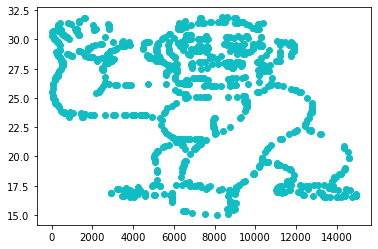

In [30]:
ax = plt.scatter(x="steps", y="bmi", data=female_group_data, c="#10bdc3")


In [31]:
my_rho_male = np.corrcoef(male_group_data['steps'], male_group_data['bmi']) 
my_rho_male

array([[ 1.       , -0.1600705],
       [-0.1600705,  1.       ]])

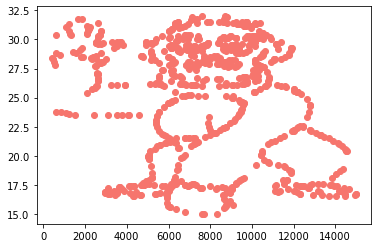

In [32]:
ax = plt.scatter(x="steps", y="bmi", data=male_group_data, c="#f6756d")
#ax.set_title("Concrete steps vs. bmi")
#ax.set_xlabel("steps");

# Part 3: Different types of visualization from DAOST

#### 3.1- Questions from DAOST
#### 3.1.1- Janert, the author of DAOST, is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better.

#### 3.1.2- Explain what is a box plot. When are box plots most useful? Are violin plots better or worse than box plots? Why?

#### 3.2 Recreating plots from DAOST. We need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined in Part 1.

#### 3.2.1- For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data.
#### 3.2.2-Create a box and whiskers plot showing the mean, median, quantiles, etc. for all 15 crime-types side-by-side. What does this plot reveal that you can't see in the plots from previous weeks?
#### 3.2.3- Now, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it:


#### 3.2.3.1- For datapoint, the only thing you care about is the time-of-day, so discard everything else.
#### 3.2.3.2- You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. (Refer to Week 3 exercise 3.2 for hints.)
#### 3.2.3.3- Now, you can create box-plots to create an overview of when various crimes occur. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Comment your results.

# PART 4: Visualizing geo-data


#### 4.1- Start by choosing a crimetype with spatial patterns that change over time. Use your data-exploration from the previous lectures to choose a good one.

we choose SEX OFFENSES, NON FORCIBLE

#### 4.2- Create a heatmap by grabbing your crimetype data across all times. Play with parameters to get plots you like and explain why you chose them and what the effect of these parameters are.

In [35]:
crime_data_heatmap =  crime_data[crime_data.Category.isin(["SEX OFFENSES, NON FORCIBLE"])].copy()
crime_data_heatmap

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
2560,16069977314031,160699773,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Thursday,2016-07-14,1900-01-01 18:00:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,5.0,NaN,28.0
68456,17010462114031,170104621,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Saturday,2017-02-04,1900-01-01 12:00:00,PARK,NONE,...,24.0,NaN,25.0,NaN,1.0,NaN,NaN,NaN,NaN,25.0
207334,14072804114031,140728041,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Sunday,2014-08-24,1900-01-01 09:00:00,CENTRAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,50.0
268117,15049488414030,150494884,14030,"SEX OFFENSES, NON FORCIBLE",INCEST,Sunday,2015-03-01,1900-01-01 12:00:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,24.0
273203,15065443614031,150654436,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Thursday,2015-07-23,1900-01-01 23:00:00,MISSION,UNFOUNDED,...,10.0,3.0,10.0,NaN,2.0,NaN,NaN,3.0,NaN,54.0
352658,12019929614030,120199296,14030,"SEX OFFENSES, NON FORCIBLE",INCEST,Thursday,2012-02-16,1900-01-01 00:01:00,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,86.0
431200,13054924914031,130549249,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Saturday,2013-06-29,1900-01-01 06:00:00,CENTRAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,50.0
434316,4010651114030,40106511,14030,"SEX OFFENSES, NON FORCIBLE",INCEST,Thursday,2003-12-18,1900-01-01 17:00:00,TENDERLOIN,DISTRICT ATTORNEY REFUSES TO PROSECUTE,...,18.0,NaN,18.0,6.0,2.0,1.0,1.0,NaN,NaN,20.0
437607,13018662514031,130186625,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Monday,2013-03-04,1900-01-01 19:00:00,MISSION,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,83.0
444110,14035222014031,140352220,14031,"SEX OFFENSES, NON FORCIBLE","SEXUAL CONTACT WITH PATIENT, FORMER PATIENT",Friday,2013-11-01,1900-01-01 00:01:00,MISSION,NONE,...,NaN,3.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN,54.0


In [36]:
from folium import plugins
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[37.773972, -122.431297],tiles="stamentoner",zoom_start = 13)  


# Ensure you're handing it floats
crime_data_heatmap['X'] = crime_data_heatmap['X'].astype(float)
crime_data_heatmap['Y'] = crime_data_heatmap['Y'].astype(float)

# List comprehension to make out list of lists
heat_data = [[row['Y'],row['X']] for index, row in crime_data_heatmap.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Display the map
map_hooray

#### 4.3- Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. Create the movie using HeatMapWithTime.

In [38]:
from folium import plugins

map_hooray = folium.Map(location=[37.773972, -122.431297],tiles="stamentoner",zoom_start = 13)  



# Ensure you're handing it floats
crime_data_heatmap['X'] = crime_data_heatmap['X'].astype(float)
crime_data_heatmap['Y'] = crime_data_heatmap['Y'].astype(float)


# Create weight column, using date
crime_data_heatmap['Weight'] = crime_data_heatmap['Date'].str[3:5]
crime_data_heatmap['Weight'] = crime_data_heatmap['Weight'].astype(float)
crime_data_heatmap = crime_data_heatmap.dropna(axis=0, subset=['X','Y', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['Y'],row['X']] for index, row in crime_data_heatmap[crime_data_heatmap['Weight'] == i].iterrows()] for i in range(0,13)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map_hooray)
# Display the map
map_hooray

AttributeError: Can only use .str accessor with string values!

#### 4.4- Comment on your results:
#### 4.4.1- What patterns does your movie reveal?
#### 4.4.2- Motivate/explain the reasoning behind your choice of crimetype and time-resolution (you can also refer to exercises/visualizations that we have done in class to motivate your choice).

# Part 5: Errors in the data.

#### 5.1- In each of the examples above, describe in your own words how the data-errors, I call attention to above, can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

In [40]:
crime_outlierdata = crime_data.loc[ (crime_data['Category'] == 'PROSTITUTION') & (crime_data['DayOfWeek'] == 'Thursday')]
crime_outlierdata

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
112,16071040413075,160710404,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Thursday,2016-09-01,1900-01-01 20:35:00,TARAVAL,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,42.0
1970,16010362713075,160103627,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Thursday,2016-02-04,1900-01-01 12:00:00,TARAVAL,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,42.0
2284,17069186613060,170691866,13060,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,2017-08-24,1900-01-01 20:05:00,NORTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,10.0,1.0,NaN,NaN,NaN,NaN,105.0
2317,16010441513060,160104415,13060,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,2016-02-04,1900-01-01 12:00:00,TARAVAL,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,42.0
2573,16077146213060,160771462,13060,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,2016-09-22,1900-01-01 12:00:00,SOUTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126535,16083621013075,160836210,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Thursday,2016-10-13,1900-01-01 19:35:00,SOUTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,32.0
2127647,16010362713060,160103627,13060,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,2016-02-04,1900-01-01 12:00:00,TARAVAL,"ARREST, BOOKED",...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,42.0
2127845,16056746513075,160567465,13075,PROSTITUTION,LOITERING FOR PURPOSE OF PROSTITUTION,Thursday,2016-07-14,1900-01-01 00:07:00,MISSION,"ARREST, BOOKED",...,15.0,3.0,15.0,NaN,2.0,NaN,NaN,3.0,NaN,53.0
2127909,16034792213060,160347922,13060,PROSTITUTION,SOLICITS FOR ACT OF PROSTITUTION,Thursday,2016-04-28,1900-01-01 15:35:00,SOUTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,32.0


#### 5.2 Find your own example of human noise in the data and visualize it. Comment your results.